<small>
Copyright (c) 2017 Andrew Glassner

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
</small>



# Deep Learning From Basics to Practice
## by Andrew Glassner, https://dlbasics.com, http://glassner.com
------
## Chapter 1: Introduction to Machine Learning
### Miscellaneous images

This notebook is provided as a “behind-the-scenes” look at code used to make some of the figures in this chapter. It is still in the hacked-together form used to develop the figures, and is only lightly commented.

In [4]:
%matplotlib inline
# %load DLBasics_Utilities.py
# import DLBasics_Utilities
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import cv2

import seaborn as sns ; sns.set()

In [5]:
# Make a File_Helper for saving and loading files.

save_files = True

import os, sys, inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(current_dir)) # path to parent dir
from DLBasics_Utilities import File_Helper
file_helper = File_Helper(save_files)

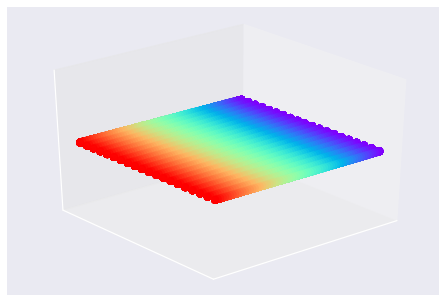

In [6]:
# Rolled and unrolled data
fig = plt.figure()
ax = Axes3D(fig)

xres = 70
yres = 20
zres = 70

xvals = []
yvals = []
zvals = []
cols = []
for z in range(zres):
    for y in range(yres):
        for x in range(xres):
            xvals.append(x)
            yvals.append(y)
            zvals.append(0)
            cols.append(x)
            
ax.set_zticks([])
ax.set_yticks([])
ax.set_xticks([])
ax.view_init(30, 50)
ax.scatter(xvals, yvals, zvals, cmap='rainbow', c=cols, s=50)
file_helper.save_figure('swiss-roll-1')
plt.show()

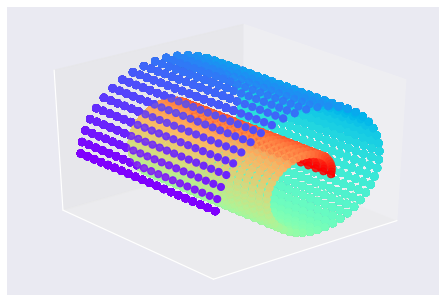

In [7]:
# The Swiss Roll data
fig = plt.figure()
ax = Axes3D(fig)

xres = 70
yres = 20
zres = 70

xvals = []
yvals = []
zvals = []
cols = []
for z in range(zres):
    for y in range(yres):
        for x in range(xres):
            angle = math.pi*3*x/xres
            radius = 1 - (.8 * x/xres)
            xvals.append(radius * np.cos(angle))
            yvals.append(y)
            zvals.append(radius * np.sin(angle))
            cols.append(x)
            
ax.set_zticks([])
ax.set_yticks([])
ax.set_xticks([])
ax.view_init(30, 50)
ax.scatter(xvals, yvals, zvals, cmap='rainbow', c=cols, s=50)
file_helper.save_figure('swiss-roll-2')
plt.show()

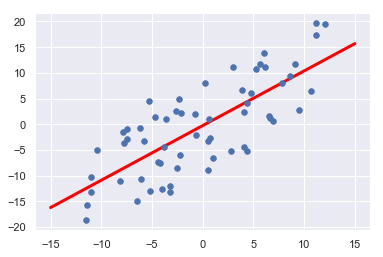

In [8]:
# A line through data. 
np.random.seed(42)
num_points = 60
xvals = np.linspace(-10, 10, num_points)
xvals += np.random.uniform(-4, 4, num_points)
yvals = xvals + np.random.uniform(-10, 10, num_points)
plt.scatter(xvals, yvals, s=30, zorder=20)

model = LinearRegression(fit_intercept=True)
lr_xvals = xvals.reshape(len(xvals), 1)
model.fit(lr_xvals, yvals)

xpred = [[-15],[15]]
ypred = model.predict(xpred)
plt.plot(xpred, ypred, color='red', lw=3, zorder=10)
file_helper.save_figure('straight-fit.png')

plt.show()

In [9]:
def PolynomialRegression(degree, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

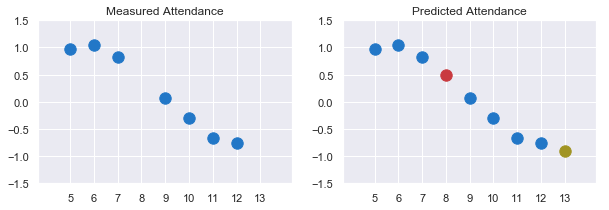

In [10]:
# Show the plots for concert attendance
np.random.seed(42)
num_points = 9

xvals = np.linspace(1.5, 4.5, num_points)
yvals = np.sin(xvals) + np.random.uniform(-.1, .10, num_points)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
scatter_x = [xvals[i] for i in [0,1,2,4,5,6,7]]
scatter_y = [yvals[i] for i in [0,1,2,4,5,6,7]]
plt.scatter(scatter_x, scatter_y, s=130, color='#2277C7')
plt.xticks(np.linspace(1.5, 4.5, 9),range(5,5+9))
plt.xlim(1.0, 5.0)
plt.ylim(-1.5, 1.5)
plt.title('Measured Attendance')

plt.subplot(1, 2, 2)

poly_model = PolynomialRegression(3)
pr_xvals = xvals.reshape(len(xvals), 1)
poly_model.fit(pr_xvals, yvals)
xpred = [[xvals[3]],[xvals[8]]]
ypred = poly_model.predict(xpred)
plt.scatter(scatter_x, scatter_y, color='#2277C7', s=130, zorder=20)

plt.scatter(xpred[0], ypred[0], color='#C93A3F', s=130)
plt.scatter(xpred[1], ypred[1], color='#A19423', s=130)
plt.xticks(np.linspace(1.5, 4.5, 9),range(5,5+9))
plt.xlim(1.0, 5.0)
plt.ylim(-1.5, 1.5)
plt.title('Predicted Attendance')

file_helper.save_figure('concert-predictions.png')

plt.show()

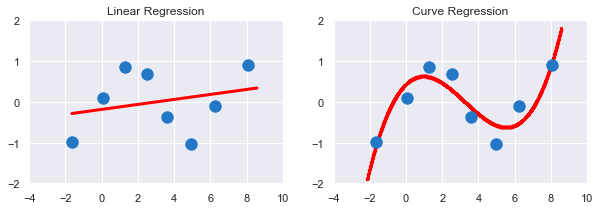

In [11]:
# linear and polynomial regressions
np.random.seed(42)
num_points = 8

xvals = np.linspace(-np.pi/2, 2.5*np.pi, num_points)
xvals += np.random.uniform(-.3, .3, num_points)
yvals = np.sin(xvals) + np.random.uniform(-.1, .10, num_points)

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.scatter(xvals, yvals, s=130, zorder=20, color='#2277C7')

model = LinearRegression(fit_intercept=True)
pr_xvals = xvals.reshape(len(xvals), 1)
model.fit(pr_xvals, yvals)
xpred = [[min(xvals)],[max(xvals)+0.5]]
ypred = model.predict(xpred)
plt.plot(xpred, ypred, color='red', lw=3, zorder=10)

plt.xlim(-4, 10)
plt.ylim(-2, 2)
plt.title("Linear Regression")

plt.subplot(1, 2, 2)
plt.scatter(xvals, yvals, s=130, zorder=20, color='#2277C7')
poly_model = PolynomialRegression(3)
pr_xvals = xvals.reshape(len(xvals), 1)
poly_model.fit(pr_xvals, yvals)

xpred = np.linspace(min(xvals)-0.5, max(xvals)+0.5, 1500)
xpred = xpred.reshape(len(xpred), 1)
ypred = poly_model.predict(xpred)
plt.scatter(xpred, ypred, color='red', s=5, zorder=10)

plt.xlim(-4, 10)
plt.ylim(-2, 2)
plt.title("Curve Regression")

file_helper.save_figure('regressions.png')

plt.show()

In [16]:
# The output of the VGG16 model is a little complicated. Each of the
# 1000 outputs contains an index number and the associated score
# of the prediction for that index. This index is the location of
# the entry in the array syn_indices_list defined in syn_indices.py.
# Those entries are strings. The index number is the line of the
# file (or the index into that array). Then we use that string
# as the key in a dictionary syn_words_dict stored in syn_words,
# and the value of that dictionary item is the descriptive string
# for that entry. These two files are just slightly python-ized
# versions of syn_indices.txt and syn_words.txt, available from 
# the original VGG16 Caffe source at 
# http://dl.caffe.berkeleyvision.org/caffe_ilsvrc12.tar.gz 

input_dir = file_helper.get_input_data_dir()
sys.path.append(input_dir)
import VGG16_syn_indices
import VGG16_syn_words

# Use the VGG16 model (and correctly formatted weights!) from Keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
model = VGG16()

In [20]:
# Hey VGG16, what do you think these pictures are?
def categorize_image(img, top_number):
    # Read in the image, and then jiggle it around to get it into
    # the expected input format. Images may stored at any size,
    # but they should be square to avoid stretching before classification.
    # First, we subtract from each component so the pixels have a 
    # zero mean. We must do this because this transformation was
    # used when the VGG16 network was trained. There were no other
    # data transformations applied.
    # Next, we shuffle the color order. CV2 stores a picture in BGR 
    # order, and VGG16 seems to wang RBG (neither one the conventional 
    # RGB order). There must be a CV2 function to shuffle the channels,
    # but I couldn't find it, so I just do it manually.
    # Then we stick an extra dimension of size 1 at the start of the
    # image's shape to make the single image look like a batch of
    # images, but the batch is just this one image.
    
    image = cv2.resize(cv2.imread(img), (224, 224)).astype(np.float32)
    blu = image[:,:,0].copy()
    grn = image[:,:,1].copy()
    red = image[:,:,2].copy()
    blu -= 103.939  # These numbers were used for the training data
    grn -= 116.779  # used for VGG16, so we must use them, too. See 
    red -= 123.68   # https://gist.github.com/baraldilorenzo/07d7802847aaad0a35d3
    image[:,:,0] = red
    image[:,:,1] = blu
    image[:,:,2] = grn

    image = np.array([image])  # make it a list of 1 image
    
    predictions = model.predict(image)
    print('Результаты распознавания:', decode_predictions(predictions, top=3)[0])
    predictions = model.predict(image)[0]
    
    top_list = []
    for i in range(top_number):
        maxarg = np.argmax(predictions)
        maxval = predictions[maxarg]
        top_list.append([maxarg, maxval])
        predictions = [i if i<maxval else -1 for i in predictions]
    report_scores = []
    report_names = []
    for i in top_list:
        n_index = VGG16_syn_indices.syn_indices_list[i[0]]
        words = VGG16_syn_words.syn_words_dict[n_index]
        words = words[:16]  # clip to first 16 chars
        report_scores.append(i[1])
        report_names.append(words)
    return (report_scores, report_names)

In [21]:
# Our test images
input_dir = file_helper.get_input_data_dir()
vgg_test_images = [
    input_dir+'/hummingbird-2139279_1920.jpg',
    input_dir+'/teaspoon-554065_1920.jpg',
    input_dir+'/corkscrew-1176167_1920.jpg',
    input_dir+'/audio-1840073_1920.jpg'
]

In [22]:
# Print out the matches
for img in vgg_test_images:
    scores, names = categorize_image(img, 3)
    print("scores=",scores)
    print("names=",names,"\n")

40960/35363 [==================================] - 0s 3us/step
Результаты распознавания: [('n01833805', 'hummingbird', 0.98950726), ('n01843065', 'jacamar', 0.009533192), ('n01828970', 'bee_eater', 0.00095515157)]
scores= [0.98950726, 0.009533192, 0.00095515157]
names= ['hummingbird', 'jacamar', 'bee eater'] 

Результаты распознавания: [('n03633091', 'ladle', 0.4292381), ('n04270147', 'spatula', 0.22263291), ('n04332243', 'strainer', 0.09408666)]
scores= [0.4292381, 0.22263291, 0.09408666]
names= ['ladle', 'spatula', 'strainer'] 

Результаты распознавания: [('n03109150', 'corkscrew', 0.3814579), ('n03532672', 'hook', 0.2908459), ('n02910353', 'buckle', 0.08138276)]
scores= [0.3814579, 0.2908459, 0.08138276]
names= ['corkscrew, bottl', 'hook, claw', 'buckle'] 

Результаты распознавания: [('n02840245', 'binder', 0.16478932), ('n04069434', 'reflex_camera', 0.10280967), ('n03657121', 'lens_cap', 0.049418483)]
scores= [0.16478932, 0.10280967, 0.049418483]
names= ['binder, ring-bin', 'reflex

In [25]:
from matplotlib import gridspec
def plot_results():
    fig = plt.figure(figsize=(8, 8))
    gs = gridspec.GridSpec(2,4) #, height_ratios=[2,2,1,1,1,1,1,1])
    for i in range(4):
        scores, names = categorize_image(vgg_test_images[i], 5)
        fig.subplots_adjust(wspace=0.2)
        fig.subplots_adjust(hspace=0.75)
        img = plt.imread(vgg_test_images[i])
        ax0 = plt.subplot(gs[2*i])
        ax0.imshow(img)
        plt.xticks([],[])
        plt.yticks([],[])
        ax1 = plt.subplot(gs[1+(2*i)])
        xs = range(len(names))
        ax1.bar(xs, scores, align='center')
        plt.xticks(xs, names, rotation='-90')
        plt.yticks([0,1], [0,1])
        plt.tick_params(axis='x', which='major', labelsize=12)
    file_helper.save_figure('vgg-4-up')
    plt.show()

Результаты распознавания: [('n01833805', 'hummingbird', 0.98950726), ('n01843065', 'jacamar', 0.009533192), ('n01828970', 'bee_eater', 0.00095515157)]
Результаты распознавания: [('n03633091', 'ladle', 0.4292381), ('n04270147', 'spatula', 0.22263291), ('n04332243', 'strainer', 0.09408666)]
Результаты распознавания: [('n03109150', 'corkscrew', 0.3814579), ('n03532672', 'hook', 0.2908459), ('n02910353', 'buckle', 0.08138276)]
Результаты распознавания: [('n02840245', 'binder', 0.16478932), ('n04069434', 'reflex_camera', 0.10280967), ('n03657121', 'lens_cap', 0.049418483)]


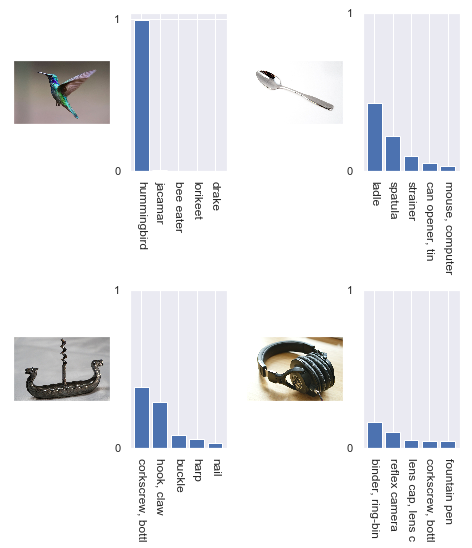

In [26]:
plot_results()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 107s 2ms/step - loss: 0.2731 - acc: 0.9183 - val_loss: 0.0680 - val_acc: 0.9776
Epoch 2/12
60000/60000 [==============================] - 123s 2ms/step - loss: 0.1019 - acc: 0.9701 - val_loss: 0.0460 - val_acc: 0.9848
Epoch 3/12
60000/60000 [==============================] - 140s 2ms/step - loss: 0.0750 - acc: 0.9774 - val_loss: 0.0384 - val_acc: 0.9870
Epoch 4/12
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0610 - acc: 0.9813 - val_loss: 0.0377 - val_acc: 0.9878
Epoch 5/12
60000/60000 [==============================] - 163s 3ms/step - loss: 0.0524 - acc: 0.9839 - val_loss: 0.0336 - val_acc: 0.9888
Epoch 6/12
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0437 - acc: 0.9

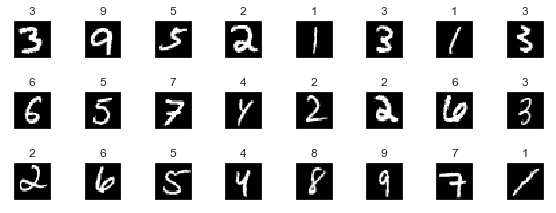

In [27]:
# Evaluate some MNIST digits by building and
# training a deep learner
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as keras_backend

# Just in case the config file isn't set up as we expect
keras_backend.set_image_data_format('channels_last')

batch_size = 128
num_classes = 10
num_epochs = 12
img_rows, img_cols = 28, 28

# Read and format MNIST image data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)
X_train /= 255
X_test /= 255

# make labels one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# build a convnet, nothing fancy
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu', 
                 input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), strides=(2,2), activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

grid_x = 8
grid_y = 3
plt.figure(figsize=(1*grid_x, 2*grid_y))
for y in range(grid_y):
    for x in range(grid_x):
        index = x + (grid_x * y)
        plt_index = x + (grid_x * y)
        plt.subplot(2*grid_y, grid_x, 1+plt_index)
        img_index = index+500
        pred_data = np.reshape(X_test[img_index], (1, 28, 28, 1))
        pred = model.predict(pred_data, verbose=0)
        plt.imshow(np.reshape(X_test[img_index],(28,28)),cmap='gray')
        plt.xticks([],[])
        plt.yticks([],[])
        plt.title(str(np.argmax(pred)))
plt.tight_layout()
file_helper.save_figure('mnist-convnet-predictions')
plt.show()